In [3]:
import os
import math
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("üå´üõ∏")

üå´üõ∏


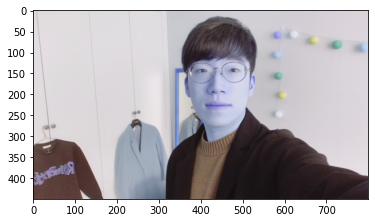

In [4]:
image_file_name = 'image.png' # ÎÇòÏùò ÏÇ¨ÏßÑÌååÏùº Ïù¥Î¶Ñ
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/'+ image_file_name #Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÏÑ§Ï†ï
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr)  # Ïù¥ÎØ∏ÏßÄ ÎåÄÍ∏∞
plt.show()  # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú

In [5]:
detector_hog = dlib.get_frontal_face_detector()  # face detection Ìï†Îãπ
print("üå´üõ∏")

üå´üõ∏


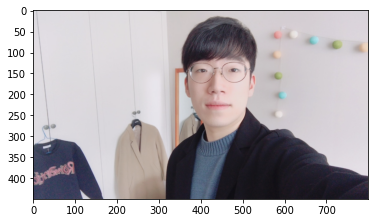

üå´üõ∏


In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)  # Ïù¥ÎØ∏ÏßÄ ÎåÄÍ∏∞
plt.show()  # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
dlib_rects = detector_hog(img_rgb, 1)   # (Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄ(Î≥ÄÏàò), num of image pyramid)
print("üå´üõ∏")

rectangles[[(345, 98) (531, 284)]]


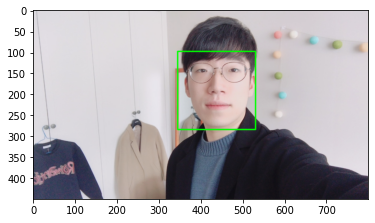

In [7]:
print(dlib_rects)   

for dlib_rect in dlib_rects:  # detector_hog(img_rgb, 1) dlib.rectangleÏùò Í∞ùÏ≤¥ left(), top(), right(), bottom(), height(), width()
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)  # cv2Î°ú ÏÇ¨Í∞ÅÌòï Í∑∏Î¶¨Í∏∞

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # ÏàòÏ†ïÌïú Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôòÌõÑ Ï†ÄÏû•
plt.imshow(img_show_rgb)  # Ïù¥ÎØ∏ÏßÄ ÎåÄÍ∏∞
plt.show()  # Ïù¥ÎØ∏ÏßÄ ÎåÄÍ∏∞

In [8]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat' # Î™®Îç∏ Í≤ΩÎ°úÏÑ§Ï†ï
landmark_predictor = dlib.shape_predictor(model_path)  #dlib ÎûúÎìúÎßàÌÅ¨ Î™®Îç∏ Ìï†Îãπ
print("üå´üõ∏")

üå´üõ∏


In [9]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ÏóêÏÑú face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # Ïù¥ÎØ∏ÏßÄÎ°ú face landmark ÏúÑÏπò(Ï¢åÌëú) ÎßåÎì§Í∏∞
    temp = list(map(lambda p: (p.x, p.y), points.parts())) # face landmark x, y Ï¢åÌëúÎ•º ÏûÑÏãú Ï†ÄÏû•
    list_landmarks.append(temp)  # tempÎ°ú ÏûÑÏãúÏ†ÄÏû•Îêú Ï¢åÌëúÎ•º 0Î≤àÏù∏Îç±Ïä§Ïóê ÌïúÍ∫ºÎ≤àÏóê ÎÑ£Í∏∞!
    
print(len(list_landmarks[0]))

68


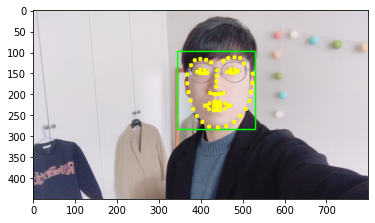

In [10]:
for i in range(len(list_landmarks[0])):  # Ï†êÏùÑ ÎûúÎìúÎßàÌÅ¨ Í∞ØÏàòÎßåÌÅº Ï∞çÏñ¥Ï§òÏïº Ìï®!
        x, y = list_landmarks[0][i]  # Ï†ÄÏû•Ìï¥Îëî Ï¢åÌëúÍ∞í Ïç®Î®πÍ∏∞.
        cv2.circle(img_show, (x, y), 5, (0, 255, 255), -1)  # Ïù¥ÎØ∏ÏßÄÏóê Ï¢åÌëúÏóê Îî∞Îùº Ï†ê Ï∞çÍ∏∞

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # ÏàòÏ†ïÌïú Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôòÌõÑ Ï†ÄÏû•
plt.imshow(img_show_rgb)  # Ïù¥ÎØ∏ÏßÄ ÎåÄÍ∏∞
plt.show()  # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•

In [12]:

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):  # zip Ìï®ÏàòÎ•º ÌÜµÌï¥ ÎèôÏãúÏóê ÎëêÍ∞ÄÏßÄ list Î∂àÎü¨Ïò§Í∏∞ 
    angle = math.atan((landmark[19][1] - landmark[24][1]) / (landmark[19][0] - landmark[24][0])) * 180 / math.pi # ÏñºÍµ¥ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥
    x = landmark[33][0]  # Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌï† Ï¢åÌëú x
    y = landmark[33][1] + (landmark[51][1]-landmark[33][1]) // 2 - 5  # Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌï† Ï¢åÌëú y (Ïù¥ÎØ∏ÏßÄ ÎÜíÏù¥Î•º 33Í≥º 51ÏÇ¨Ïù¥Ïóê ÎÑ£Í∏∞ ÏúÑÌï¥ Ï¢åÌëúÍ∞íÏùÑ ÎπºÍ≥† ÎÇòÎàî)
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (438,205)
(w,h) : (187,187)


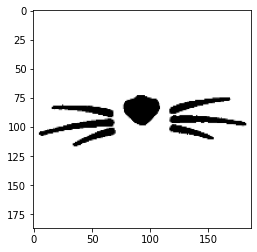

In [13]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
sticker_path_rotated = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers_rotated.png'
# Ïù¥ÎØ∏ÏßÄ ÏÜêÏã§ÏóÜÏù¥ ÌöåÏ†ÑÏúÑÌï¥ PILÎ°ú Î∂àÎü¨ÏôÄÏÑú ÌöåÏ†ÑÌïú Ïù¥ÎØ∏ÏßÄÎ•º Îã§Ïãú Ï†ÄÏû•
img_sticker = Image.open(sticker_path) # Í≤ΩÎ°úÏóêÏÑú Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
img_sticker = img_sticker.rotate(-angle,fillcolor='white', expand=True)  # ÌöåÏ†ÑÍ≥º Î∞∞Í≤Ω Ï±ÑÏö∞Í∏∞
img_sticker.save(sticker_path_rotated)  # Ï†ÄÏû•

img_sticker = cv2.imread(sticker_path_rotated) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Îã§Ïãú Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Ï†àÌïòÍ∏∞


plt.imshow(img_sticker)
plt.show()

In [14]:
# Ïù¥ÎØ∏ÏßÄÏùò ÏôºÏ™Ω ÏúÑÍ∞Ä ÎûúÎìúÎßàÌÅ¨Ïùò Ï¢åÌëúÎ°ú ÏÑ§Ï†ï ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÎØ∏ÏßÄ x, y Ïû¨ÏÑ§Ï†ï
# Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï§ëÍ∞ÑÏù¥ Ï¢åÌëúÏùò Ï§ëÍ∞ÑÍ≥º ÏùºÏπòÌïòÎèÑÎ°ù ÏúÑÏπò ÏÑ§Ï†ï.
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (345,112)


In [15]:
# Ïù¥ÎØ∏ÏßÄ ÏúÑÏπòÍ∞Ä ÏùåÏàòÏùº Í≤ΩÏö∞ Ïù¥ÎØ∏ÏßÄÎ•º ÏûêÎ¶Ñ
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

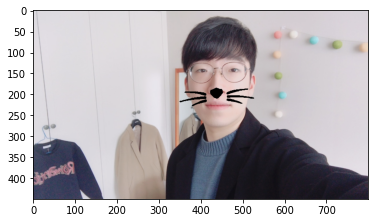

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()